# Week 2: Quantifying Texts

POP77142 Quantitative Text Analysis for Social Scientists

Tom Paskhalis

## Overview

-   Motivation
-   Character Encoding
-   Text Preprocessing
-   APIs
-   JSON

# Motivation

## Parliamentary Power in 17th c. England

<figure>
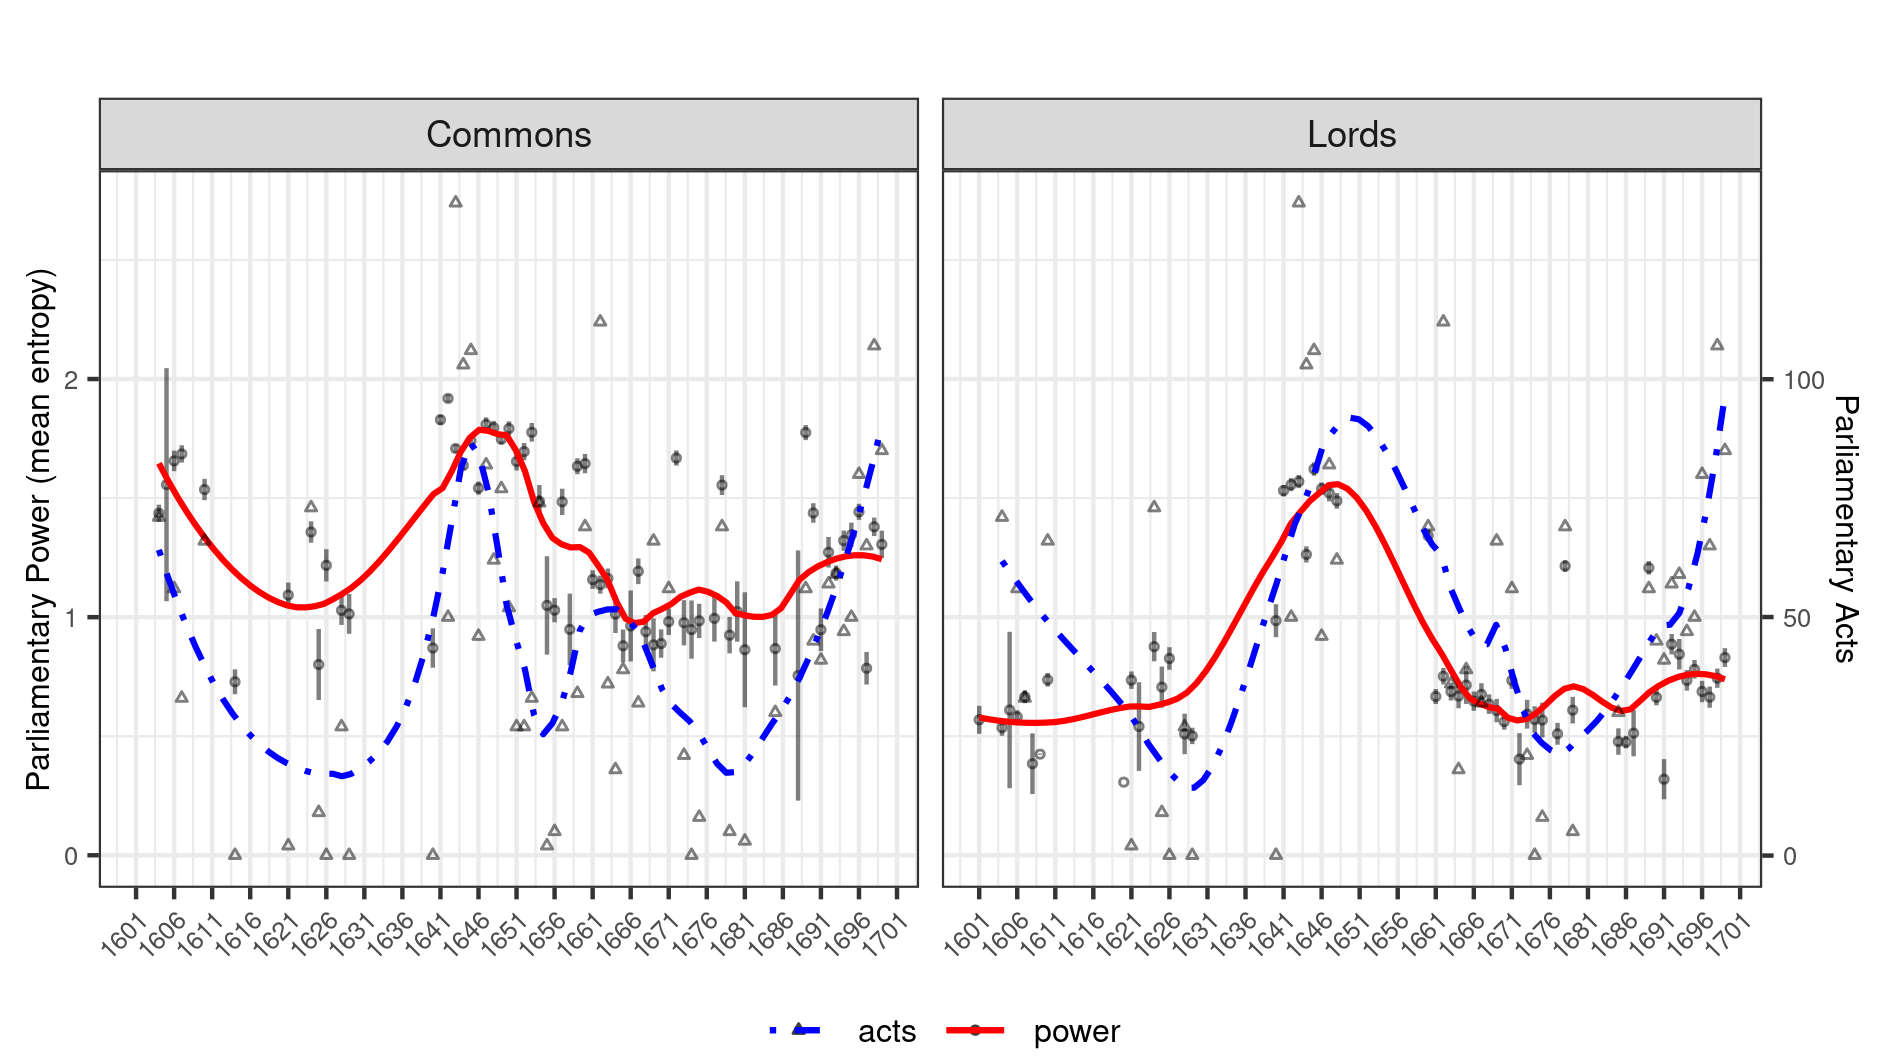
<figcaption aria-hidden="true"><a
href="https://doi.org/10.31219/osf.io/qgu9c">(Rodon &amp; Paskhalis,
2024)</a></figcaption>
</figure>

## Ideological Positions in Germany

<figure>
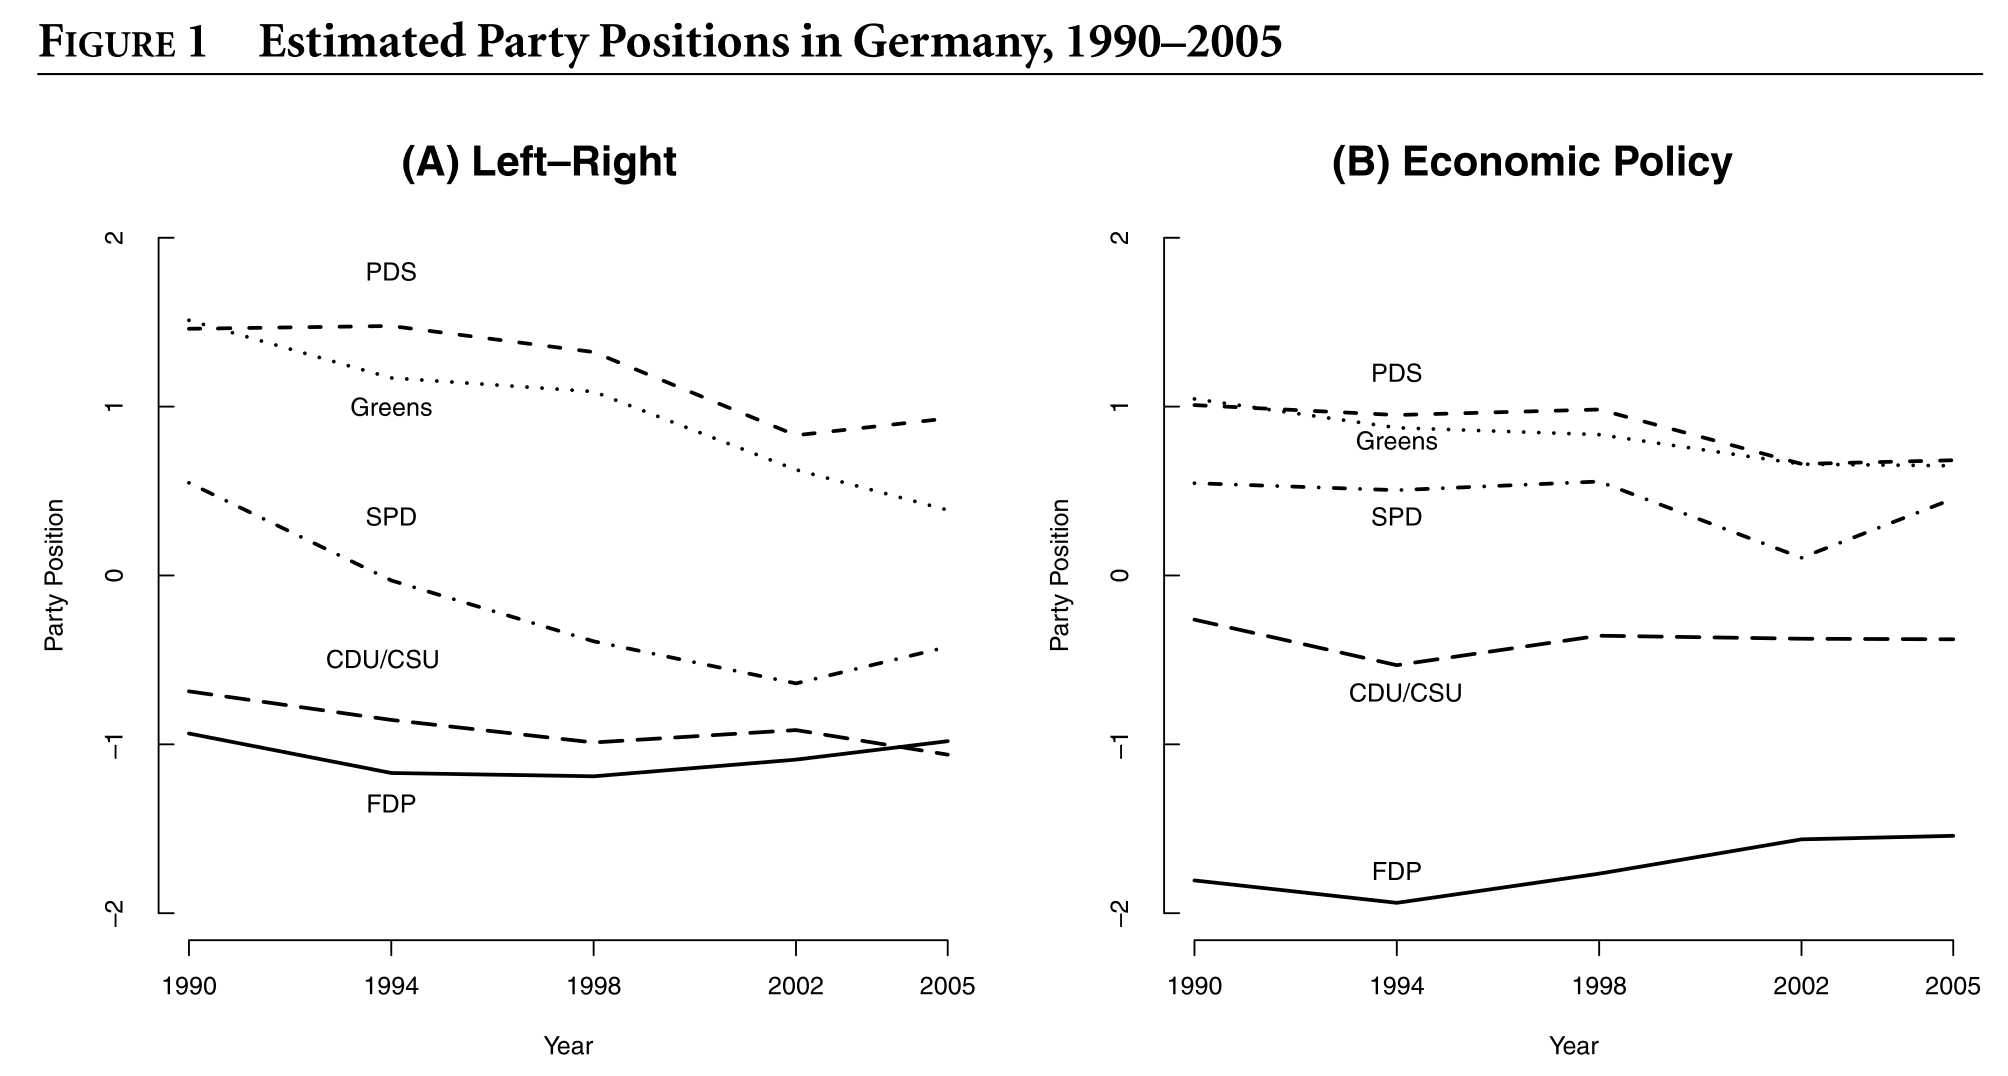
<figcaption aria-hidden="true"><a
href="https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-5907.2008.00338.x">(Slapin
&amp; Proksch, 2008)</a></figcaption>
</figure>

## Complexity of US State of the Union Addresses

<figure>
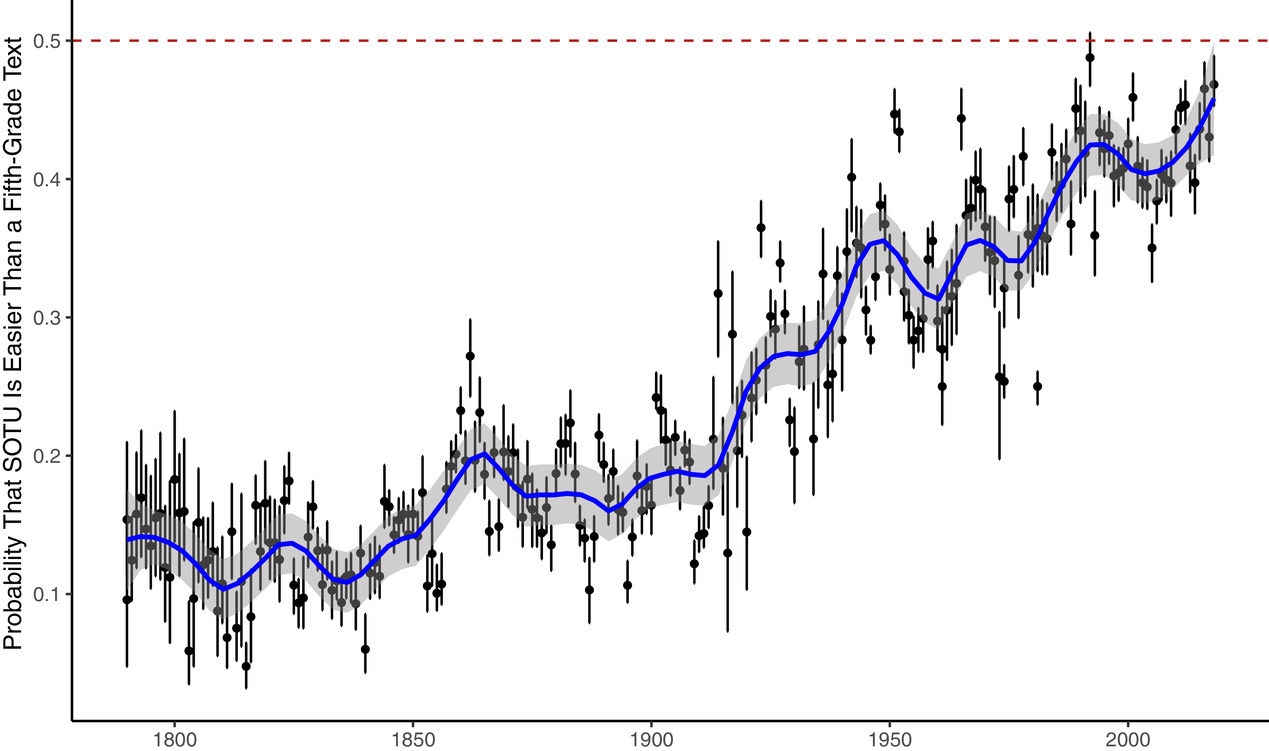
<figcaption aria-hidden="true"><a
href="https://onlinelibrary.wiley.com/doi/full/10.1111/ajps.12423">(Benoit,
Munger &amp; Spirling, 2019)</a></figcaption>
</figure>

# Character Encoding

## Foundations of Computer Memory

-   Bits:
    -   The smallest unit of digital data.
    -   Can be either 0 or 1.
    -   *n* bits can represent $2^n$ different values.
    -   E.g. 2 bits can represent 4 values: 00, 01, 10, 11.
-   Bytes:
    -   8 bits = 1 byte
    -   Thus, 1 byte can represent 256 values:
        $[00000000, 00000001, ..., 11111111]$.
    -   [Metric
        aggregations](https://en.wikipedia.org/wiki/Byte#Multiple-byte_units)
        than are kilobyte (KB), megabyte (MB), gigabyte (GB), etc.

## Character Encoding

-   **Character** - “the smallest component of written language that has
    semantic value” (<https://unicode.org/glossary/#character>).
    -   E.g. “h”, “ε”, “4”, “&”, “!”, “€”, “🤖”.
-   **Character set** - a collection of characters.
    -   E.g. Latin alphabet, Greek alphabet, Arabic numerals,
        punctuation marks, etc.
-   **Code point** - the unique value assigned to each character in a
    set.
    -   Depends on what is a considered a valid value: binary - 101101,
        decimal - 45, hexadecimal - 2D, etc.
-   A mapping between code points and characters is called an
    **encoding**.

## ASCII

-   **ASCII** (**A**merican **S**tandard **C**ode for **I**nformation
    **I**nterchange) - one of the earlier wide-spread character
    encodings.
-   Only encodes $2^7 = 128$ characters (of which 95 are printable).
    -   Essentially, English alphabet, Arabic numerals, and some
        punctuation marks.
-   Later extended to $2^8 = 256$ characters<br>(aka **ISO-8859-1**,
    **Latin-1**, closely related to **Windows-1252**).
    -   Added support for most Western European languages.
-   A lot more needed to support all the world’s languages…

## ASCII

<figure>
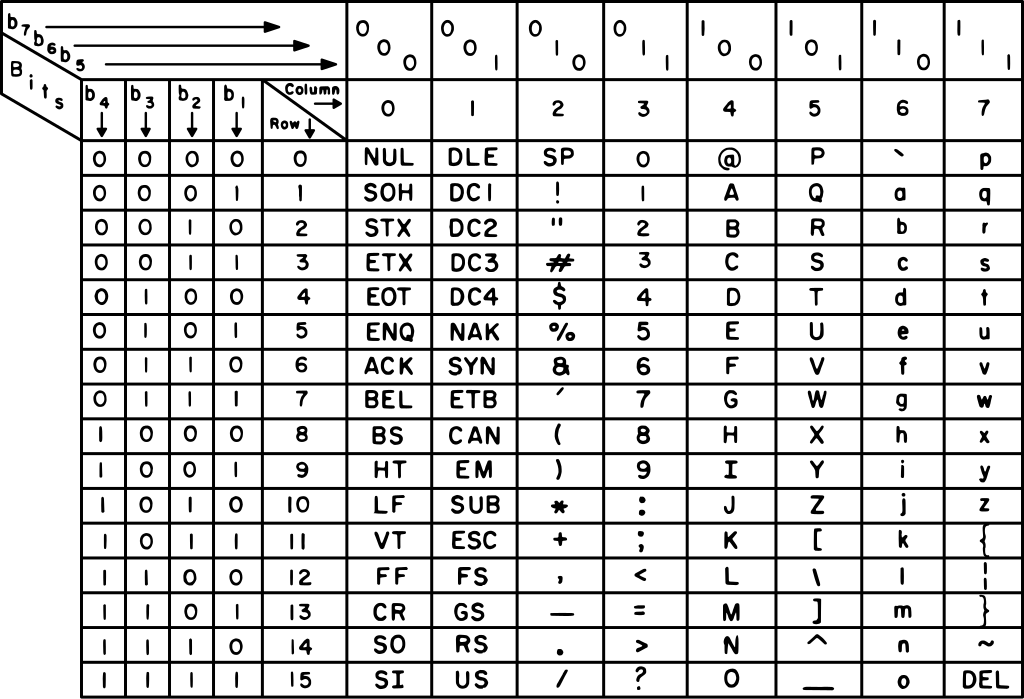
<figcaption aria-hidden="true">(<a
href="https://commons.wikimedia.org/wiki/File:USASCII_code_chart.svg">Wikipedia</a>
&amp; <a
href="https://www.google.de/books/edition/Military_Standard/um2cRERx4S4C?gbpv=1&amp;pg=RA3-PA2">US
DoD</a>)</figcaption>
</figure>

. . .

-   E.g., decimal code point for “A” is 65, comprised of these bits:
    -   1000001 (original ASCII)
    -   01000001 (ISO-8859-1)

## Unicode

-   Designed to support all the world’s writing systems that can be
    digitized.
-   Variable-length, between 1 and 4 bytes (8 and 32 bits).
-   First 128 code points are the same as in ASCII (backward
    compatibility).
-   **UTF-8** - most common Unicode encoding (also **UTF-16**, but more
    rare):
    -   1 byte for ASCII characters.
    -   2 bytes for most Latin, Greek, Cyrillic, CJK, etc.
    -   3 bytes for the rest of the BMP.
    -   4 bytes for the rest of Unicode.

# Digital Storage of Text

## Plain Text & Binary Files

-   **Plain text** files contain only human-readable characters.
    -   “Simple” text, e.g. `.txt`
    -   Markup languages, e.g. `.md`, `.Rmd`, `qmd`, `.html`
    -   Data storage, e.g. `.csv`, `.tsv`, `.tab`, `.json`, `.xml`
    -   Images, e.g. `.svg`, `.eps`
    -   Computer code, e.g. `.py`, `.R`, `.tex`, `.sh`
    -   Some other: `.ipynb` (effectively, `.json`), `.docx`
        (effectively, zipped `.xml`)
-   **Binary** files contain computer-readable data (parts can be
    human-readable).
    -   Text, e.g. `.doc`, `.rtf`, `.pdf`
    -   Data storage, e.g. `.pickle`, `.rds`, `.feather`
    -   Images, e.g. `.png`, `.jpg`, `.gif`
-   Not always dichotomous (e.g. `.docx`, `.pdf`, `.svg`).

## Text Encoding Caveats

-   Plain text files don’t contain information about encoding.
-   Instead, each software “guesses” (often, assumes the default).
-   If the guess is wrong, text can be displayed incorrectly
    ([*mojibake*](https://en.wikipedia.org/wiki/Mojibake)).
-   UTF-8 is the most common encoding (the one you should use).
-   However, many texts still use other encodings.
-   Windows is often a problem (can use `Windows-1252` or `UTF-16`).
-   In general, no easy way to know the encoding of a text file.

## Text Encoding: Example

Write out text using Python in `ISO-8859-1` encoding.

In [ ]:
tain_bo_cualinge = "Fecht n-óen do Ailill & do Meidb íar ndérgud a rígleptha dóib i Crúachanráith Chonnacht, arrecaim comrád chind cherchailli eturru."

with open("../temp/latin1.txt", "w", encoding = "ISO-8859-1") as f:
    f.write(tain_bo_cualinge)

130

. . .

Read in text in R using the default (`UTF-8`) encoding.

In [ ]:
tain_bo_cualinge <- readLines("../temp/latin1.txt")

Warning in readLines("../temp/latin1.txt"): incomplete final line found on
'../temp/latin1.txt'

[1] "Fecht n-\xf3en do Ailill & do Meidb \xedar nd\xe9rgud a r\xedgleptha d\xf3ib i Cr\xfaachanr\xe1ith Chonnacht, arrecaim comr\xe1d chind cherchailli eturru."

. . .

Using `ISO-8859-1` (note the difference in the encoding name).

In [ ]:
tain_bo_cualinge <- readLines("../temp/latin1.txt", encoding = "latin1")

Warning in readLines("../temp/latin1.txt", encoding = "latin1"): incomplete
final line found on '../temp/latin1.txt'

[1] "Fecht n-óen do Ailill & do Meidb íar ndérgud a rígleptha dóib i Crúachanráith Chonnacht, arrecaim comrád chind cherchailli eturru."

## Text Encoding: Things to Try

-   Pick a movie you like.
-   Go to [OpenSubtitles](https://www.opensubtitles.org/).
-   Find subtitles for that movie in a language that uses a different
    script.
-   Download the subtitles and try to open them in a text editor.
-   Check the ‘guessed’ encoding of the file.
-   Are all characters displayed correctly?
-   Try to open the file programmatically in R or Python.

# Designing a Text Analysis Study

## Workflow in Text Analysis

<figure>
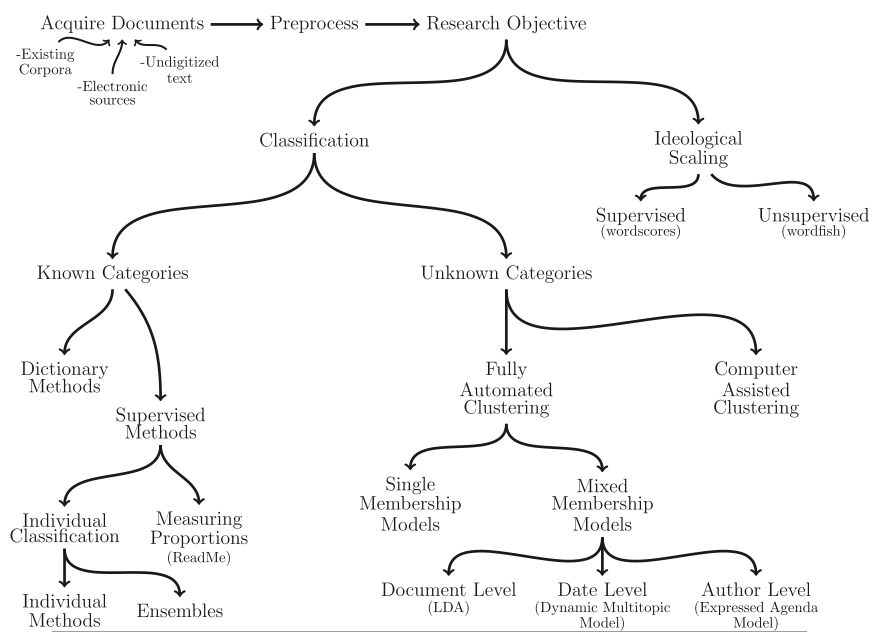
<figcaption aria-hidden="true"><a
href="https://doi.org/10.1093/pan/mps028">(Grimmer &amp; Stewart,
2013)</a></figcaption>
</figure>

## Sample vs Population

-   Basic Idea: Observed text is a stochastic realization.
-   Systematic features shape most of observed verbal content.
-   Non-systematic, random features also shape verbal content.

. . .

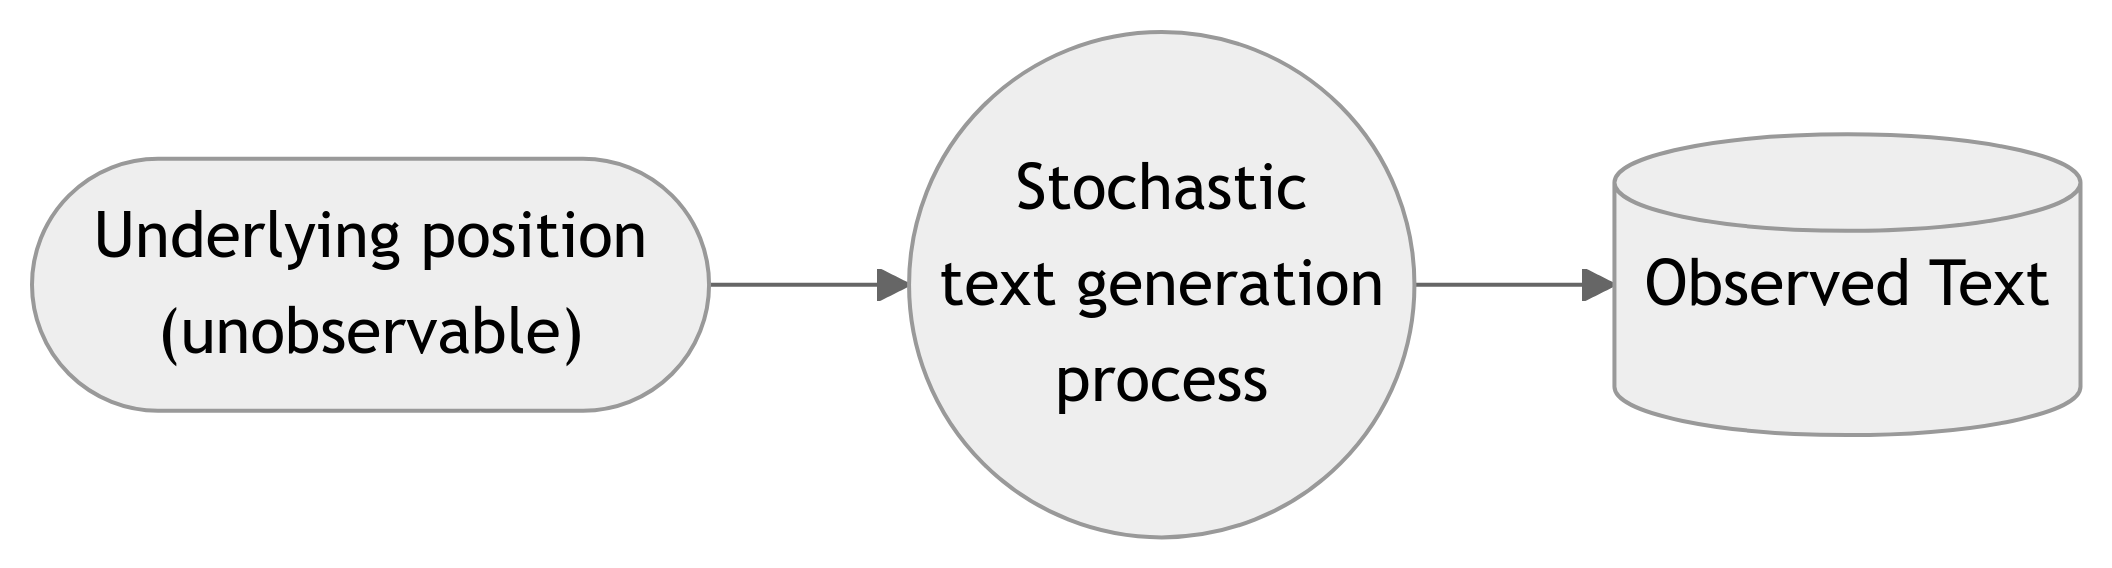

## Implications of a Stochastic View

-   Observed text is not the only text that could have been generated.
-   Research (system) design would depend on the question and quantity
    of interest.
-   Very different if you are trying to monitor something like hate
    speech, where what you actually say matters, not the value of your
    “expected statement”.
-   Means that having “all the text” is still not a “population”.

## Sampling Strategies

-   Be clear what is you *sample* and your *population*.
-   May not be feasible to perform any sampling.
-   Different types of sampling vary from random to purposive:
    -   Random sampling (e.g. politician’s speeches)
    -   Non-random sampling (e.g. messages containing hate speech on a
        social media platform)
-   Key is to make sure that what is being analyzed is a valid
    representation of the phenomenon as a whole - a question of research
    design.

# Text Preprocessing

## Quantifying Texts

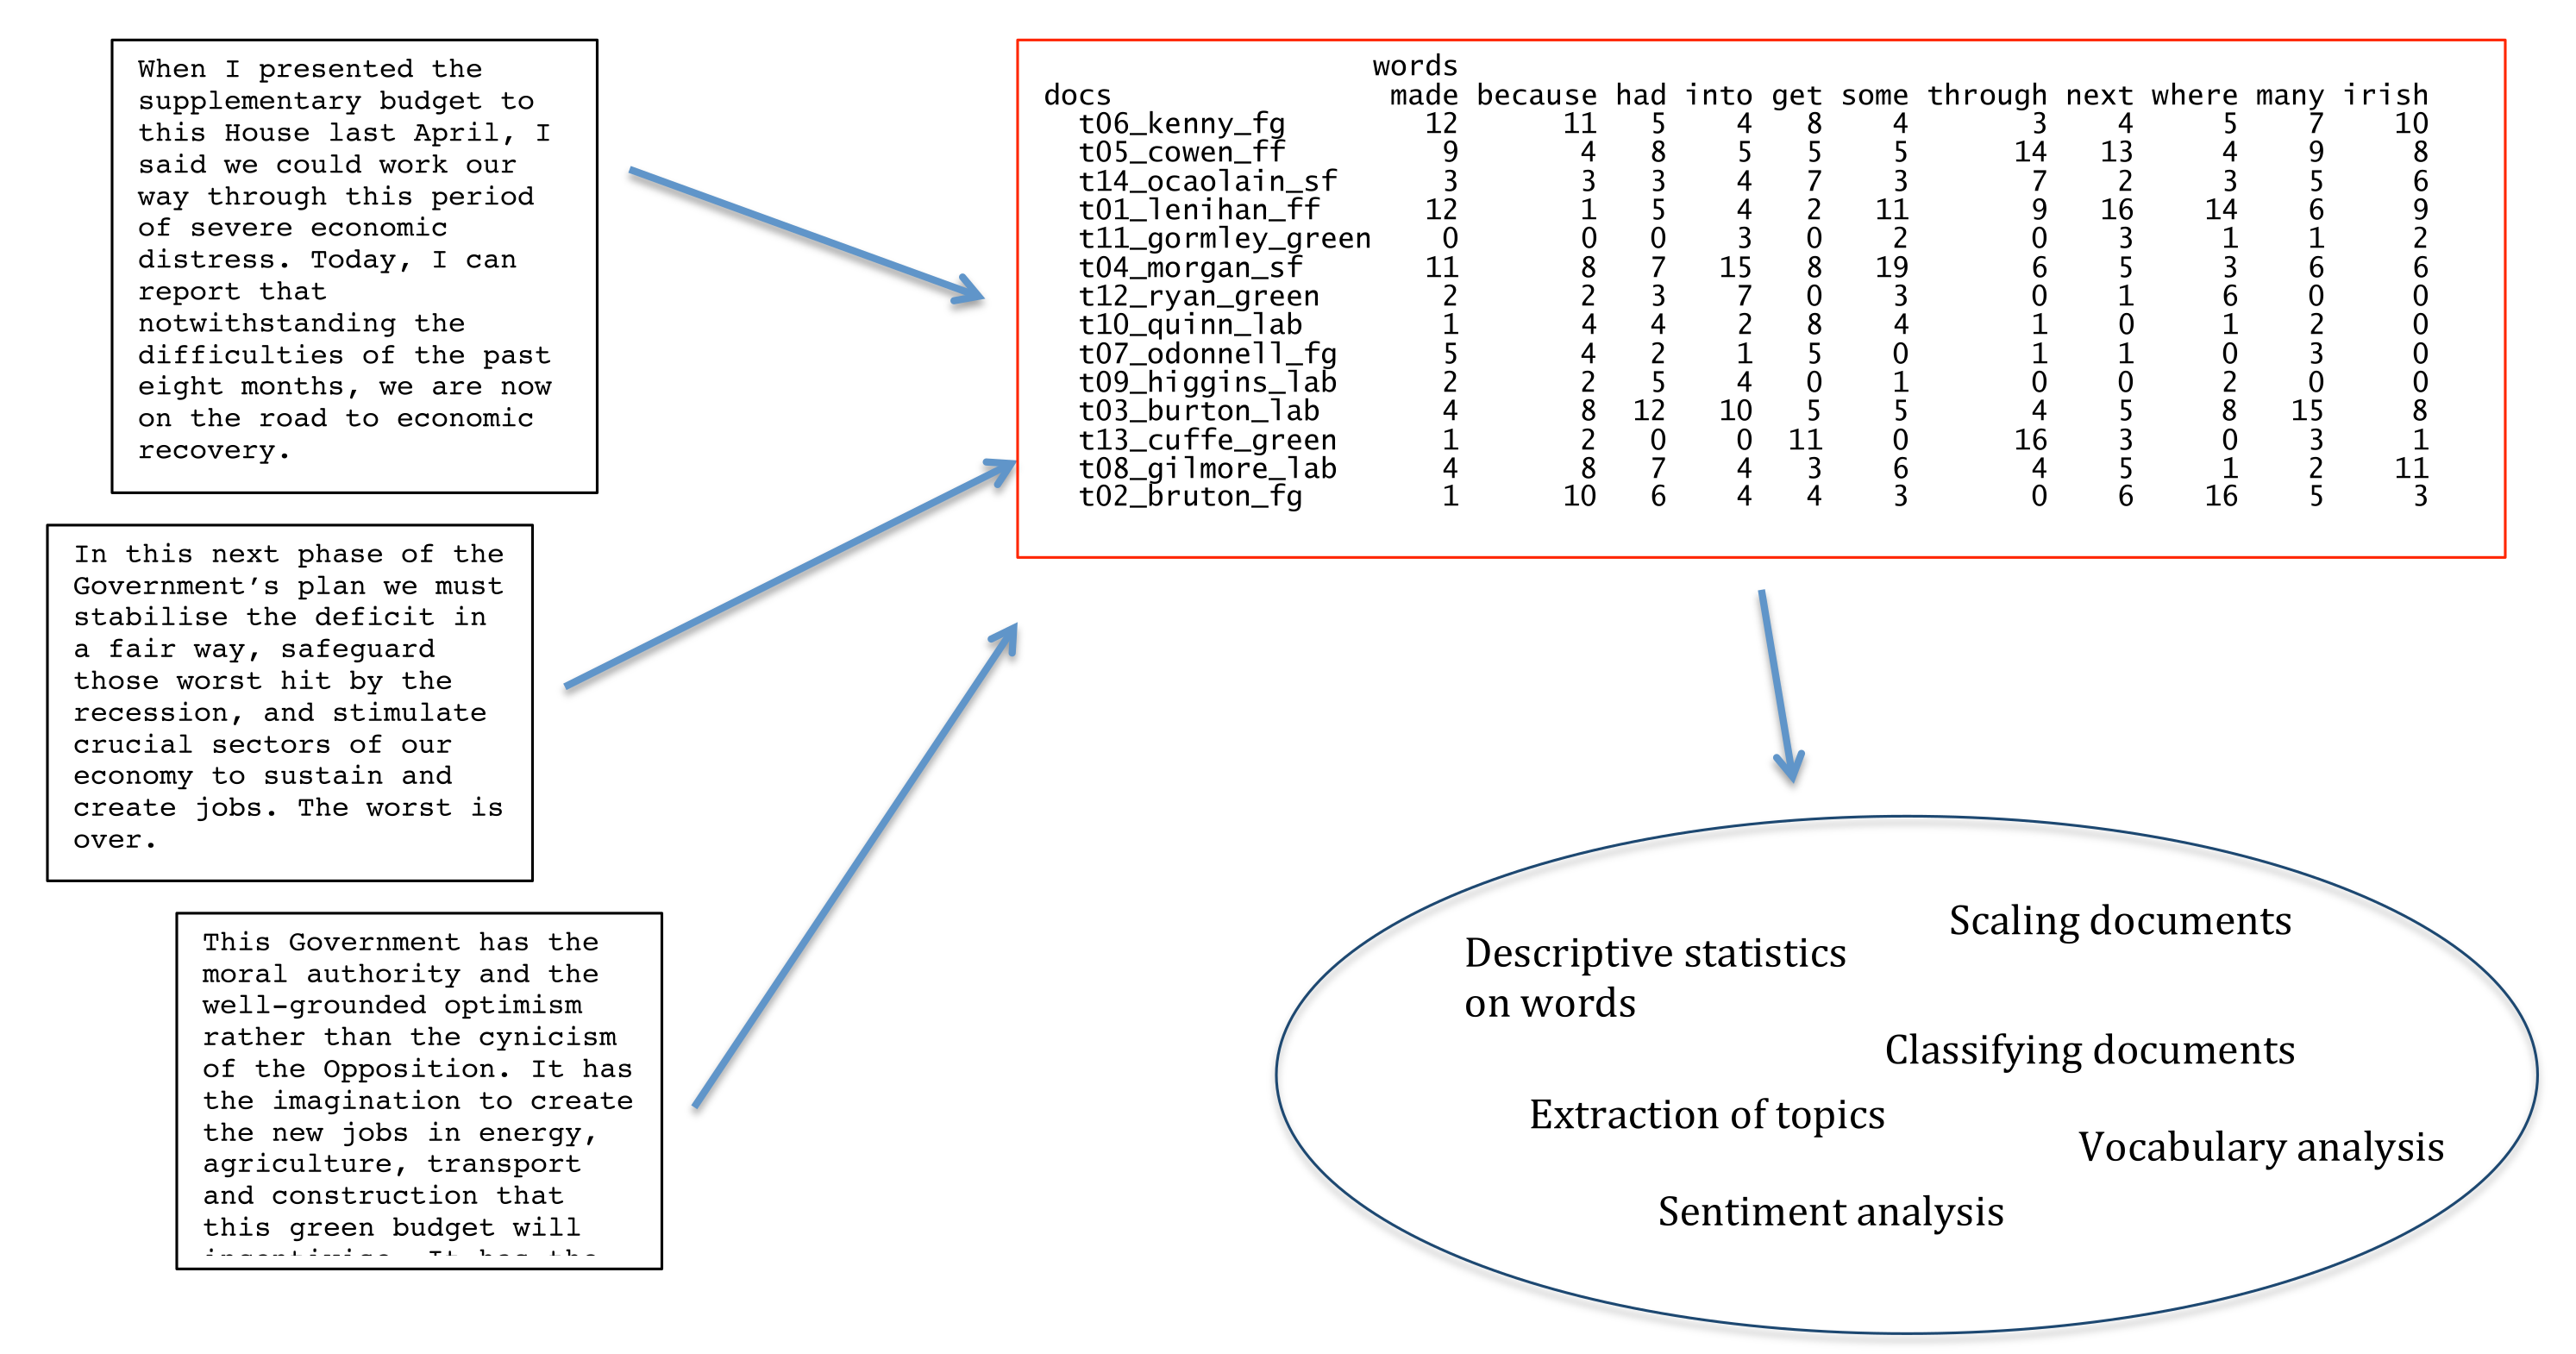

## Some QTA Terminology

-   **Corpus** - a collection of texts for analysis.
    -   E.g. SOTU addresses, Hansard debates, party manifestos, etc.
-   **Document** - a single text in the corpus.
    -   E.g. a single SOTU address, one speech, a specific party
        manifesto, etc.
-   **Token** - a single unit of text.
    -   E.g. typically a word, but can include punctuation, numbers,
        hashtags, etc.
-   **Type** - a unique token.
    -   E.g. articles like “the” and “a” appearing throughout the
        corpus.
-   **Tokenization** - the process of breaking a text into tokens.

## Some Linguistic Terminology

-   Tokens constitute the basic unit of analysis (particularly in NLP
    applications).
-   But how tokens are constructed can vary.
-   It might be useful to consider different tokens as the same.
    -   E.g. “runs”, “running”, “ran” are all forms of the same word.
-   **Stemming** - mechanically removing affixes (usually, suffixes)
    from tokens.
    -   E.g. “running” -\> “run”, “runs” -\> “run”.
-   **Lemmatization** - reducing tokens to their base (root) or
    dictionary form.
    -   E.g. “ran” -\> “run”, “runner” -\> “run”.
-   While lemmatization is more accurate, it also requires more built-in
    knowledge about a language.

## Tokenization: Example

In [ ]:
library("quanteda")

Package version: 4.2.0
Unicode version: 15.1
ICU version: 74.2

Parallel computing: disabled

See https://quanteda.io for tutorials and examples.

. . .

In [ ]:
text <- "The quick brown fox jumps over the lazy dog."
tokens <- quanteda::tokens(text)
tokens

Tokens consisting of 1 document.
text1 :
 [1] "The"   "quick" "brown" "fox"   "jumps" "over"  "the"   "lazy"  "dog"  
[10] "."    

. . .

In [ ]:
quanteda::ntoken(tokens)

text1 
   10 

. . .

In [ ]:
quanteda::ntype(tokens)

text1 
   10 

. . .

In [ ]:
tokens <- quanteda::tokens_tolower(tokens)
quanteda::ntoken(tokens)

text1 
   10 

. . .

In [ ]:
quanteda::ntype(tokens)

text1 
    9 

. . .

In [ ]:
tokens_stemmed <- quanteda::tokens_wordstem(tokens, language = "english")
tokens_stemmed

Tokens consisting of 1 document.
text1 :
 [1] "the"   "quick" "brown" "fox"   "jump"  "over"  "the"   "lazi"  "dog"  
[10] "."    

## Stopwords

-   Not all words can be assumed to be equally informative.
-   E.g. “the”, “a”, “and”, etc. are common in most texts.
-   **Stopwords** are words that are removed from the text before
    analysis.

. . .

In [ ]:
library("stopwords")

. . .

In [ ]:
stopwords::stopwords(language = "en")

  [1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] 

# API

## APIs

-   **API** - **A**pplication **P**rogramming **I**nterface.
-   Programmatic way to interact with a software application/service.
-   Widely used in computing (even on a single machine).
-   Here, focus on web APIs, that provide interface to web services.
-   A set of structured HTTP/S requests returns some responses.
    -   E.g. in XML or JSON format.

## APIs vs Web Scraping

Advantages:

-   Cleaner data collection: no malformed HTML, consistency, fewer legal
    issues, etc.
-   Standardised data access processes.
-   Scalability.
-   Potentially, pre-existing robust packages for handling common tasks.

. . .

Disadvantages:

-   Limited availability.
-   Dependency on API providers.
-   Access limits
-   Rate limits.
-   Price

## Principles of APIs

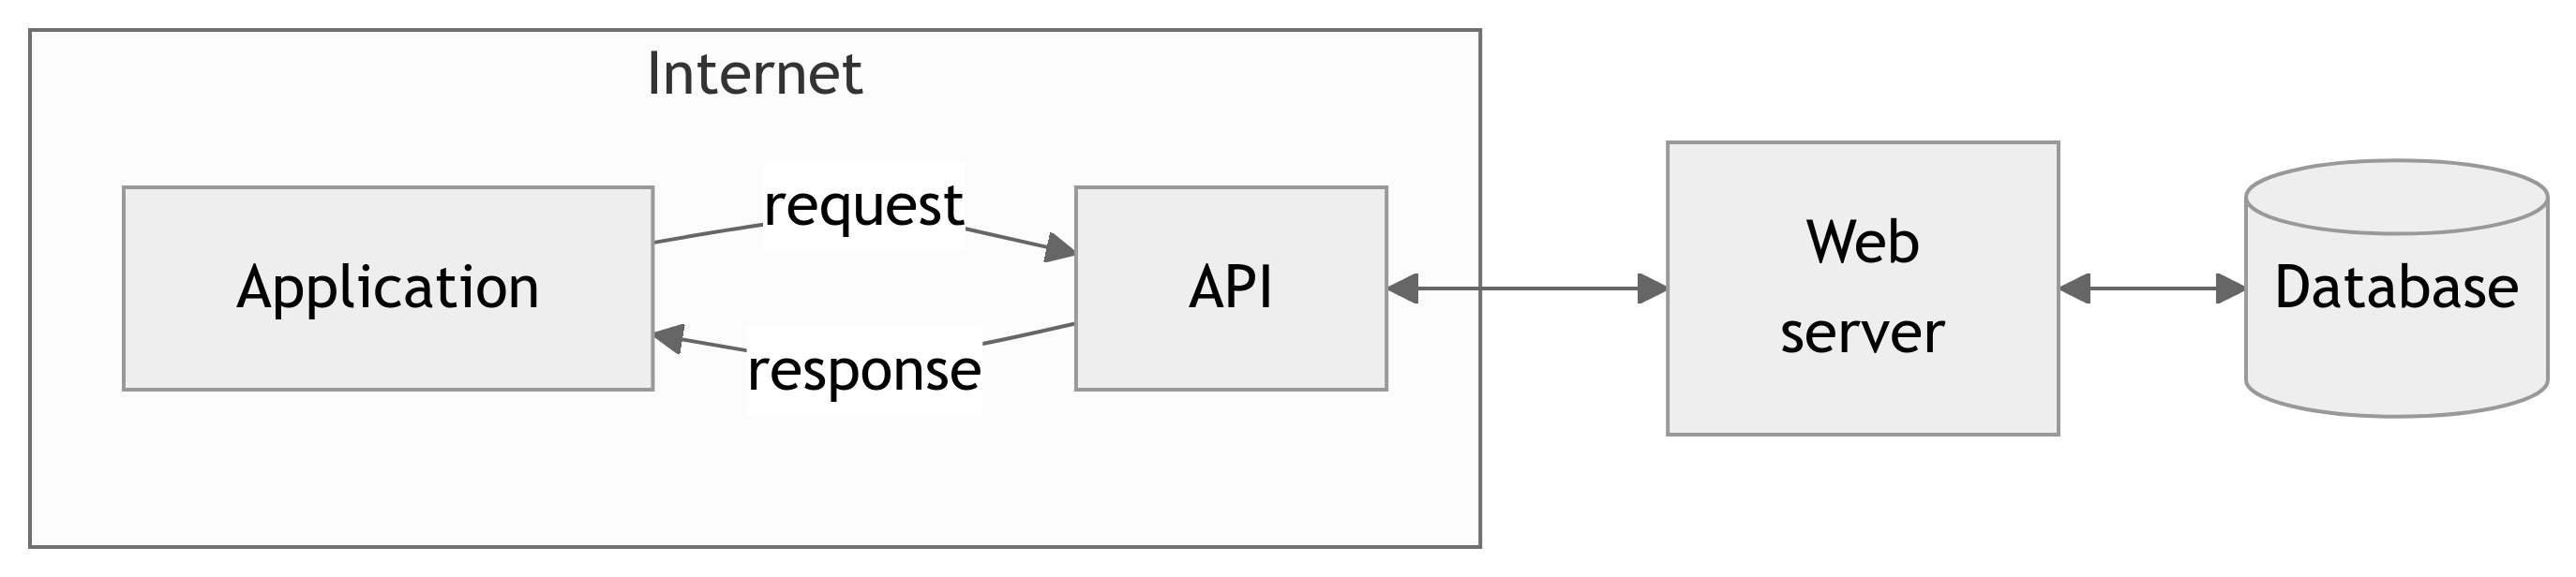

## Working with Web APIs

-   Types of APIs:
    -   **RESTful APIs** - queries for static information at a given
        moment,
    -   **Streaming APIs** - tracking real-time changes (e.g. posts,
        economic indicators, etc.)
-   API documentation varies by provider.
-   But usually is rather technical in nature (written for developers).
-   Some key terms:
    -   **Endpoint** - URL (web location) that receives requests and
        sends responses.
    -   **Parameters** - custom information that can be passed to the
        API.
    -   **Response** - the data returned by the API.

## Authentication

-   Many APIs require a **key** or **tokens**.
-   Most APIs are rate-limited
    -   E.g. restrictions by user/key/IP address/time period.
-   Make sure that you understand the terms of service/use.
-   Even providers of public free APIs can impose some restrictions.

## Example: Guardian API

In [ ]:
library("httr")

. . .

In [ ]:
# It is a good idea to not hard-code the API key in the script
# and, instead, load it dynamically from a file
api_key <- readLines("../temp/guardian_api_key.txt")

. . .

In [ ]:
# Endpoint
base_url <- "https://content.guardianapis.com/search"

. . .

In [ ]:
# Parameters
params <- list(
  "api-key" = api_key,
  "q" = "ireland",
  "page-size" = 1
)

. . .

In [ ]:
# Make the request and receive the response
response <- httr::GET(url = base_url, query = params)

. . .

In [ ]:
# Check the status of the response (200 means successful)
# Status codes 4xx are client errors; 5xx are server errors
response$status_code

[1] 200

. . .

In [ ]:
response

Response [https://content.guardianapis.com/search?api-key=2cae3602-5bc7-4c38-83e2-634c28798ba9&q=ireland&page-size=1]
  Date: 2025-04-10 09:16
  Status: 200
  Content-Type: application/json
  Size: 684 B

## JSON

-   **JSON** (**J**ava**S**cript **O**bject **N**otation) is a
    lightweight data-interchange format
-   It is commonly used in web APIs (as well as elsewhere, e.g. Jupyter
    Notebooks).
-   At its core, JSON objects are key-value pairs (often deeply nested).
-   Keys have to be strings with double quotes.
-   Values can be one of the following types:
    -   String (e.g., “example”)
    -   Number (e.g., 42, 3.141)
    -   Array (e.g., \[“a”, “b”, “c”\])
    -   Boolean (e.g., true, false)
    -   null

> **Extra**
>
> [JSON Syntax](https://www.w3schools.com/js/js_json_syntax.asp)

## JSON: Example

In [ ]:
library("jsonlite")

. . .

In [ ]:
json <- httr::content(response, as = "text", encoding = "UTF-8")

. . .

In [ ]:
json |>
  jsonlite::prettify()

{
    "response": {
        "status": "ok",
        "userTier": "developer",
        "total": 113007,
        "startIndex": 1,
        "pageSize": 1,
        "currentPage": 1,
        "pages": 113007,
        "orderBy": "relevance",
        "results": [
            {
                "id": "us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland",
                "type": "article",
                "sectionId": "us-news",
                "sectionName": "US news",
                "webPublicationDate": "2025-04-03T10:53:49Z",
                "webTitle": "Trump tariffs could undermine Brexit deal in Northern Ireland",
                "webUrl": "https://www.theguardian.com/us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland",
                "apiUrl": "https://content.guardianapis.com/us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland",
                "isHosted": false,
                "pillarId": "pillar/news",
                "pillarName": "News"
            

## JSON Representation

-   As JSON is just a text format, its representation in code will vary
    by language.
    -   E.g. in R JSON -\> list, in Python -\> dictionary

. . .

In [ ]:
json_parsed <- jsonlite::fromJSON(json)

. . .

In [ ]:
str(json_parsed)

List of 1
 $ response:List of 9
  ..$ status     : chr "ok"
  ..$ userTier   : chr "developer"
  ..$ total      : int 113007
  ..$ startIndex : int 1
  ..$ pageSize   : int 1
  ..$ currentPage: int 1
  ..$ pages      : int 113007
  ..$ orderBy    : chr "relevance"
  ..$ results    :'data.frame': 1 obs. of  11 variables:
  .. ..$ id                : chr "us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland"
  .. ..$ type              : chr "article"
  .. ..$ sectionId         : chr "us-news"
  .. ..$ sectionName       : chr "US news"
  .. ..$ webPublicationDate: chr "2025-04-03T10:53:49Z"
  .. ..$ webTitle          : chr "Trump tariffs could undermine Brexit deal in Northern Ireland"
  .. ..$ webUrl            : chr "https://www.theguardian.com/us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland"
  .. ..$ apiUrl            : chr "https://content.guardianapis.com/us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland"
  .. ..$ isHosted          : logi FALSE
 

## JSON Representation

In [ ]:
dim(json_parsed$response$results)

[1]  1 11

. . .

In [ ]:
head(json_parsed$response$results)

                                                              id    type
1 us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland article
  sectionId sectionName   webPublicationDate
1   us-news     US news 2025-04-03T10:53:49Z
                                                       webTitle
1 Trump tariffs could undermine Brexit deal in Northern Ireland
                                                                                      webUrl
1 https://www.theguardian.com/us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland
                                                                                           apiUrl
1 https://content.guardianapis.com/us-news/2025/apr/03/trump-tariffs-brexit-deal-northern-ireland
  isHosted    pillarId pillarName
1    FALSE pillar/news       News

## Next

-   Tutorial: Text Preprocessing and APIs
-   Next week: Classifying texts
-   Assignment 1: Due 15:59 on Wednesday, 26th March (submission on
    Blackboard)